<a href="https://colab.research.google.com/github/SUNNYTHAKURCODE/MACHINELEARNING/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

# generate a sequence from the model
def generate_seq(model, tokenizer, seed_text, n_words):
	in_text, result = seed_text, seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		encoded = array(encoded)
		# predict a word in the vocabulary
		yhat = model.predict_classes(encoded, verbose=0)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text, result = out_word, result + ' ' + out_word
	return result

# source text
data = """ Jack and Jill went up the hill\n
		To fetch a pail of water\n
		Jack fell down and broke his crown\n
		And Jill came tumbling after\n """
# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# create word -> word sequences
sequences = list()
for i in range(1, len(encoded)):
	sequence = encoded[i-1:i+1]
	sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))
# split into X and y elements
sequences = array(sequences)
X, y = sequences[:,0],sequences[:,1]
# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X, y, epochs=500, verbose=2)


Vocabulary Size: 22
Total Sequences: 24
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 1, 10)             220       
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                12200     
_________________________________________________________________
dense_14 (Dense)             (None, 22)                1122      
Total params: 13,542
Trainable params: 13,542
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/500
 - 0s - loss: 3.0910 - accuracy: 0.0417
Epoch 2/500
 - 0s - loss: 3.0904 - accuracy: 0.0833
Epoch 3/500
 - 0s - loss: 3.0897 - accuracy: 0.1667
Epoch 4/500
 - 0s - loss: 3.0889 - accuracy: 0.1250
Epoch 5/500
 - 0s - loss: 3.0882 - accuracy: 0.1250
Epoch 6/500
 - 0s - loss: 3.0874 - accuracy: 0.1250
Epoch 7/500
 - 0s - loss: 3.0866 - accuracy: 0.1250
Epoch 8/500
 - 0s - loss: 3.0858 - accuracy: 0.1250
Epoch 9/500
 - 0s - loss: 3.0850 - accuracy: 0.1250
Epoch 10/500
 - 0s - loss: 3.0842 - accuracy: 0.1250
Epoch 11/500
 - 0s - loss: 3.0834 - accuracy: 0.1250
Epoch 12/500
 - 0s - loss: 3.0825 - accuracy: 0.1250
Epoch 13/500
 - 0s - loss: 3.0817 - accuracy: 0.1250
Epoch 14/500
 - 0s - loss: 3.0808 - accuracy: 0.1250
Epoch 15/500
 - 0s - loss: 3.0799 - accuracy: 0.1250
Epoch 16/500
 - 0s - loss: 3.0790 - accuracy: 0.1250
Epoch 17/500
 - 0s - loss: 3.0781 - accuracy: 0.1250
Epoch 18/500
 - 0s - loss: 3.0772 - accuracy: 0.1250
Epoch 19/500
 - 0s - loss: 3.0762 - accuracy: 0.1250
Ep

In [ ]:
# evaluate
print(generate_seq(model, tokenizer, 'Jack', 6))

Jack and jill went up the hill


In [ ]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
import matplotlib.pyplot as plt


# generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# pre-pad sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
		# predict probabilities for each word
		yhat = model.predict_classes(encoded, verbose=0)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
	return in_text

# source text
data = """ Jack and Jill went up the hill\n
		To fetch a pail of water\n
		Jack fell down and broke his crown\n
		And Jill came tumbling after\n """
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]
# retrieve vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# encode 2 words -> 1 word
sequences = list()
for i in range(2, len(encoded)):
	sequence = encoded[i-2:i+1]
	sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))
# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)
# split into input and output elements
sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length-1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history= model.fit(X, y, epochs=500, verbose=2)
# evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'And Jill', 3))
print(generate_seq(model, tokenizer, max_length-1, 'fell down', 5))
print(generate_seq(model, tokenizer, max_length-1, 'pail of', 5))

Vocabulary Size: 22
Total Sequences: 23
Max Sequence Length: 3
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 2, 10)             220       
_________________________________________________________________
lstm_15 (LSTM)               (None, 50)                12200     
_________________________________________________________________
dense_15 (Dense)             (None, 22)                1122      
Total params: 13,542
Trainable params: 13,542
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/500
 - 0s - loss: 3.0912 - accuracy: 0.0000e+00
Epoch 2/500
 - 0s - loss: 3.0902 - accuracy: 0.0435
Epoch 3/500
 - 0s - loss: 3.0895 - accuracy: 0.1304
Epoch 4/500
 - 0s - loss: 3.0886 - accuracy: 0.1739
Epoch 5/500
 - 0s - loss: 3.0876 - accuracy: 0.1739
Epoch 6/500
 - 0s - loss: 3.0867 - accuracy: 0.1739
Epoch 7/500
 - 0s - loss: 3.0858 - accuracy: 0.1739
Epoch 8/500
 - 0s - loss: 3.0849 - accuracy: 0.1739
Epoch 9/500
 - 0s - loss: 3.0839 - accuracy: 0.1739
Epoch 10/500
 - 0s - loss: 3.0830 - accuracy: 0.1739
Epoch 11/500
 - 0s - loss: 3.0820 - accuracy: 0.1739
Epoch 12/500
 - 0s - loss: 3.0811 - accuracy: 0.1739
Epoch 13/500
 - 0s - loss: 3.0801 - accuracy: 0.1739
Epoch 14/500
 - 0s - loss: 3.0790 - accuracy: 0.1739
Epoch 15/500
 - 0s - loss: 3.0780 - accuracy: 0.1739
Epoch 16/500
 - 0s - loss: 3.0769 - accuracy: 0.1739
Epoch 17/500
 - 0s - loss: 3.0758 - accuracy: 0.1739
Epoch 18/500
 - 0s - loss: 3.0747 - accuracy: 0.1739
Epoch 19/500
 - 0s - loss: 3.0736 - accuracy: 0.173

dict_keys(['loss', 'accuracy'])


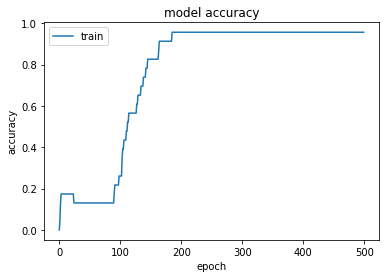

In [ ]:
print(history)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [ ]:
print(generate_seq(model, tokenizer, max_length-1, 'Jack and', 5))

Jack and jill came tumbling after after


In [ ]:
print(generate_seq(model, tokenizer, max_length-1, 'And Jill', 5))

And Jill came tumbling after after jill


In [ ]:
print(generate_seq(model, tokenizer, max_length-1, 'fell down', 5))

fell down and broke his crown and


In [ ]:
print(generate_seq(model, tokenizer, max_length-1, 'pail of', 5))

pail of water jack fell down and
